# 1. IMDB Sentiment Classification


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# ===============================
# 1. IMDB Sentiment Classification
# ===============================

# (a) Load the IMDB dataset from tensorflow.keras.datasets
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 200
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# (b) Preprocess: pad/truncate sequences to the same length
X_train = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post')

# (c) Use an embedding layer followed by:
#     • Flatten or GlobalAveragePooling1D
#     • Dense(64), ReLU
#     • Dense(1), Sigmoid
model_imdb = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16),
    tf.keras.layers.GlobalAveragePooling1D(),  # or Flatten()
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# (d) Train with binary crossentropy loss
model_imdb.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

history_imdb = model_imdb.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

# (e) Report accuracy on test set
test_loss, test_acc = model_imdb.evaluate(X_test, y_test)
print(f'IMDB Test Accuracy: {test_acc:.4f}')


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5822 - loss: 0.6815 - val_accuracy: 0.7568 - val_loss: 0.5451
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8095 - loss: 0.4730 - val_accuracy: 0.8512 - val_loss: 0.3682
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8674 - loss: 0.3269 - val_accuracy: 0.8620 - val_loss: 0.3312
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8931 - loss: 0.2708 - val_accuracy: 0.8738 - val_loss: 0.3122
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9088 - loss: 0.2368 - val_accuracy: 0.8770 - val_loss: 0.3101
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9205 - loss: 0.2094 - val_accuracy: 0.8598 - val_loss: 0.3374
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9262 - loss: 0.1919 - val_accuracy: 0.8666 - val_loss: 0.3332
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9337 - loss: 0.1807 - val_accuracy:

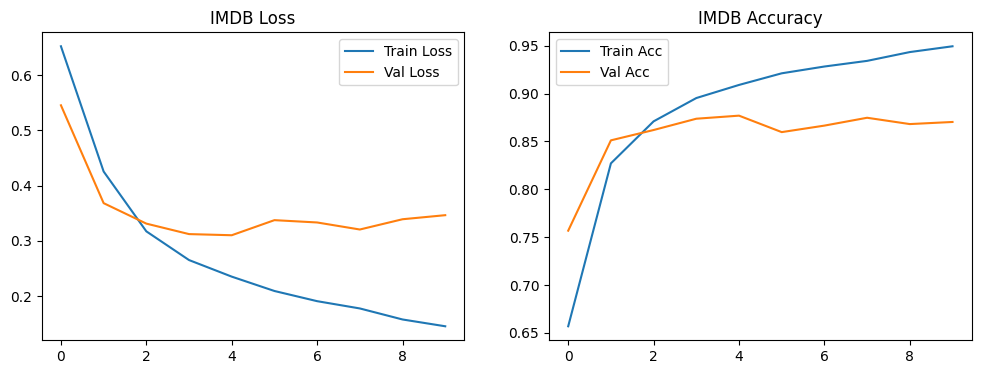

In [3]:

# (f) Plot training loss/accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_imdb.history['loss'], label='Train Loss')
plt.plot(history_imdb.history['val_loss'], label='Val Loss')
plt.title('IMDB Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_imdb.history['accuracy'], label='Train Acc')
plt.plot(history_imdb.history['val_accuracy'], label='Val Acc')
plt.title('IMDB Accuracy')
plt.legend()
plt.show()


# 2. Predict House Prices using ANN (California)

In [4]:


# ===============================================
# 2. Predict House Prices using ANN (California)
# ===============================================

# (a) Use California Housing dataset (sklearn.datasets.fetch_california_housing)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X, y = housing.data, housing.target

# (b) Normalize features (Z-score)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# (c) Build an ANN:
#     • Dense(128), ReLU
#     • Dense(64), ReLU
#     • Dense(1) — no activation
model_house = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Regression: no activation
])

# (d) Train with Mean Squared Error (MSE)
model_house.compile(optimizer='adam',
                    loss='mse',
                    metrics=['mae'])

history_house = model_house.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.9663 - mae: 1.0043 - val_loss: 0.5342 - val_mae: 0.5106
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4836 - mae: 0.4898 - val_loss: 0.4143 - val_mae: 0.4606
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3856 - mae: 0.4377 - val_loss: 0.4062 - val_mae: 0.4391
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3635 - mae: 0.4242 - val_loss: 0.3818 - val_mae: 0.4347
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3638 - mae: 0.4241 - val_loss: 0.3827 - val_mae: 0.4447
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3420 - mae: 0.4115 - val_loss: 0.3669 - val_mae: 0.4188
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3307 - mae: 0.4014 - val_loss: 0.3574 - val_mae: 0.4266
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3283 - mae: 0.4004 - val_loss: 0.3446 - val_mae: 0.4007
Epoch 9/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3057 

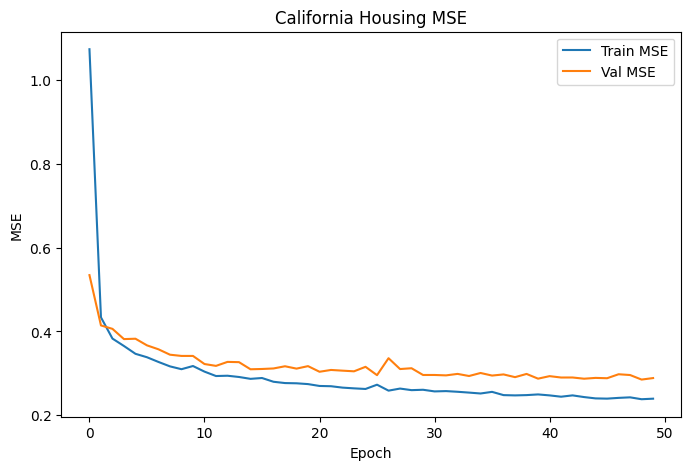

In [5]:

# (e) Plot training and validation MSE vs. epochs
plt.figure(figsize=(8, 5))
plt.plot(history_house.history['loss'], label='Train MSE')
plt.plot(history_house.history['val_loss'], label='Val MSE')
plt.title('California Housing MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()
